In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install ftfy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pytesseract
import cv2
import os
import matplotlib.pyplot as plt
import ftfy
import re
%matplotlib inline

In [4]:
pan_card="/content/pan1.png"

In [5]:
pan_card

'/content/pan1.png'

In [9]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 5 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,641 kB/s)
debconf: unable to initia

In [7]:
def ExtractDetails(image_path):
    text = pytesseract.image_to_string((image_path), lang = 'eng')
    text = text.replace("\n", " ")
    text = text.replace("  ", " ")
    regex_num = re.compile('[A-Z]{5}[0-9]{4}[A-Z]{1}')
    
    image = cv2.imread(os.path.join(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")  
    
    if len(regex_num.findall(text)) == 0:
        print(f'Blurry Image for tesseract. Input new clear image for viewing pan card number')
    else:
        print("Pan Card Number : ", regex_num.findall(text)[0])
        
 
    
   

Pan Card Number :  ELWPM8089J


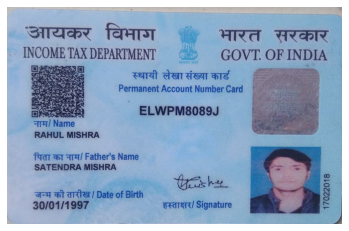

In [11]:
ExtractDetails("/content/pan1.png")